In [1]:
import cv2 
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
#initializing recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create();
recognizer.read('trainedData/data.yml')
cascadePath = "haarcascade_frontalface_default.xml"
detector = cv2.CascadeClassifier(cascadePath);
font = cv2.FONT_HERSHEY_SIMPLEX

In [3]:
#function to load images from the testing data and then create faces and ids list
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy,scaleFactor = 1.1,minNeighbors = 5)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    return faceSamples,ids

In [4]:
faces,ids = getImagesAndLabels('testing')

## Predicting the id's for the faces in testing data

In [5]:
#predict the ids for the faecs
predicted_ids = []
for face in faces :
    pid , con = recognizer.predict(face)
    predicted_ids.append(pid)

In [6]:
# convert ids and predicted_ids to np.array so they can be used to compute confusion matrix
predicted_ids = np.array(predicted_ids)
ids = np.array(ids)

# Finding Confusion Matrix using sklearn

In [7]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , precision_score, recall_score, f1_score

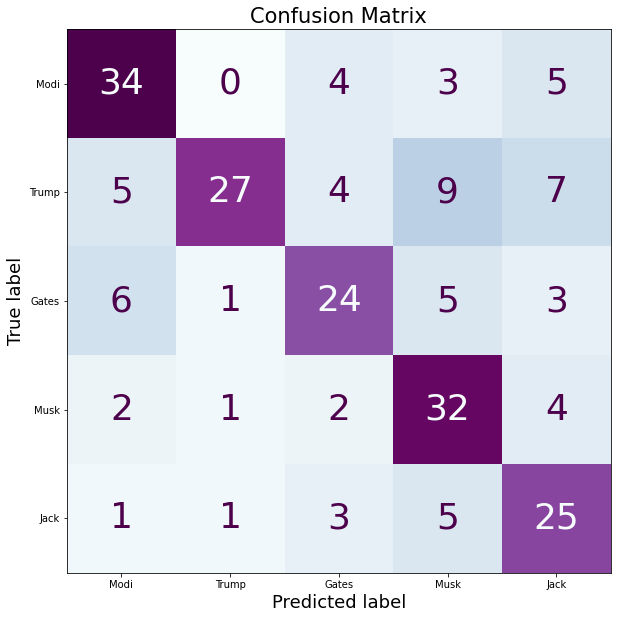

In [8]:
cm = confusion_matrix(ids, predicted_ids)
fig ,ax  = plt.subplots(figsize=(10,10))
sns.set(font_scale=3.0) 
ax.set_xlabel('Predicted labels', fontdict={'size':'18'});
ax.set_ylabel('Observed labels', fontdict={'size':'18'});
title_font = {'size':'21'}  
ax.set_title('Confusion Matrix', fontdict=title_font);
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Modi','Trump','Gates','Musk','Jack'])
disp.plot(ax = ax ,cmap = 'BuPu',colorbar = False) 

## Precision and Recall

### Precision = $ \dfrac{TP}{TP+FP}$

### Recall = $ \dfrac{TP}{TP+FN}$

### f1Score is harmonic mean of precision and recall

In [9]:
precision = precision_score(ids , predicted_ids,average=None)
precision

array([0.70833333, 0.9       , 0.64864865, 0.59259259, 0.56818182])

In [10]:
recall = recall_score(ids, predicted_ids,average=None)
recall

array([0.73913043, 0.51923077, 0.61538462, 0.7804878 , 0.71428571])

In [11]:
fscore = f1_score(ids, predicted_ids,average=None)
fscore

array([0.72340426, 0.65853659, 0.63157895, 0.67368421, 0.63291139])

In [12]:
df = pd.DataFrame({
    ' ' : ['Modi','Trump','Gates','Musk','Jack'],
    'Precision' : precision,
    'Recall' : recall,
    'f Score' : fscore
}).set_index([' '])

In [13]:
df

,Precision,Recall,f Score
,,,
Modi,0.708333,0.739130,0.723404
Trump,0.900000,0.519231,0.658537
Gates,0.648649,0.615385,0.631579
Musk,0.592593,0.780488,0.673684
Jack,0.568182,0.714286,0.632911


In [18]:
img = Image.open('multiImages.jpg').convert('L')
faces = []
img = np.array(img,'uint8')
ftemp = detector.detectMultiScale(img,scaleFactor = 1.1,minNeighbors = 5)
for (x,y,w,h) in ftemp:
    faces.append(img[y:y+h,x:x+w])

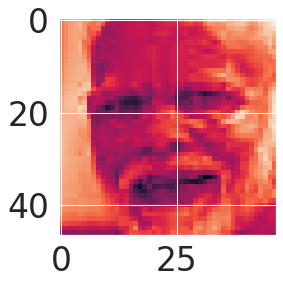

In [19]:
for face in faces:
    plt.imshow(face)

In [20]:
len(faces)

1